### House Price Prediction

#### Goal: Predict house prices based on dataset features

#### Step 1: Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

#### Step 2: Load Dataset

In [12]:
data = pd.read_csv("housing.csv")
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Step 3: Basic Data Exploration

In [13]:
print("\nDataset Info:")
print(data.info())

print("\nMissing values:")
print(data.isnull().sum())

print("\nStatistical Summary:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroa

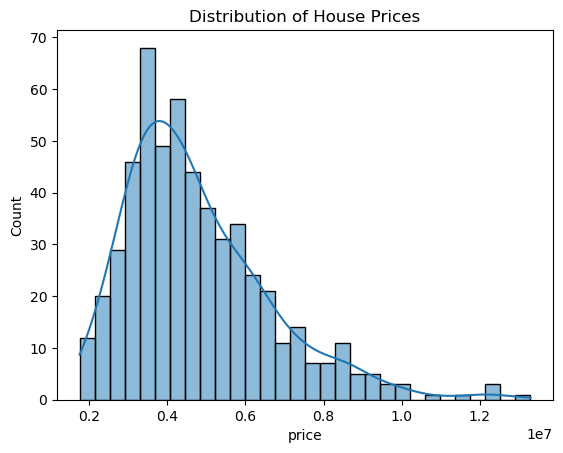

In [14]:
# Distribution of target variable
sns.histplot(data['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()

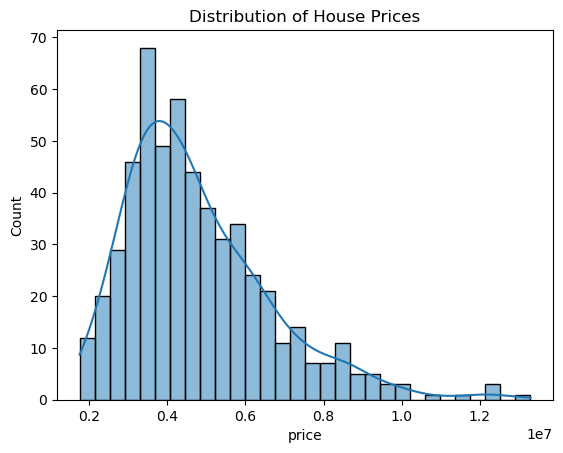

In [6]:
# Plot price distribution
sns.histplot(data['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()


In [15]:
# Count plots for categorical columns
categorical_cols = ["mainroad", "guestroom", "basement", 
                    "hotwaterheating", "airconditioning", 
                    "prefarea", "furnishingstatus"]

In [8]:
# Step 4: Preprocessing
# -------------------------
categorical_cols = ["mainroad", "guestroom", "basement", 
                    "hotwaterheating", "airconditioning", 
                    "prefarea", "furnishingstatus"]

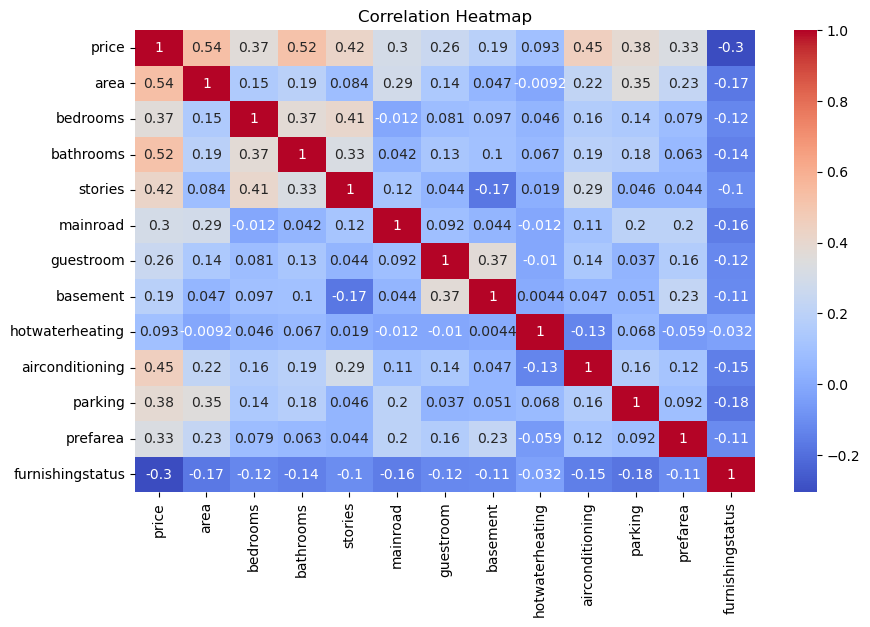

In [10]:
# Step 5: Correlation Heatmap
# -------------------------
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

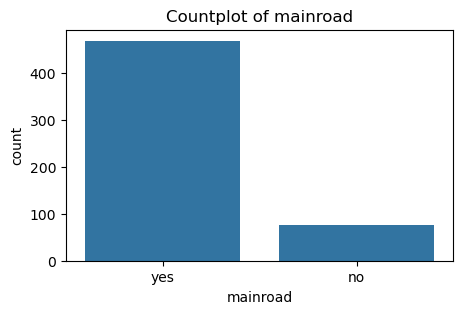

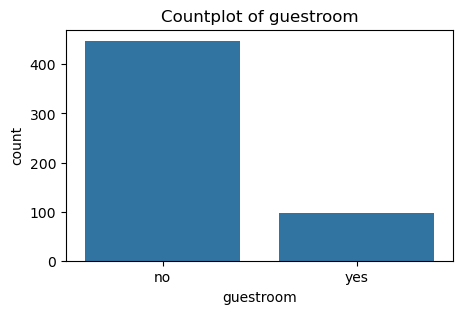

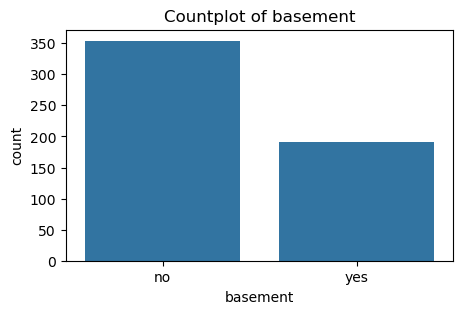

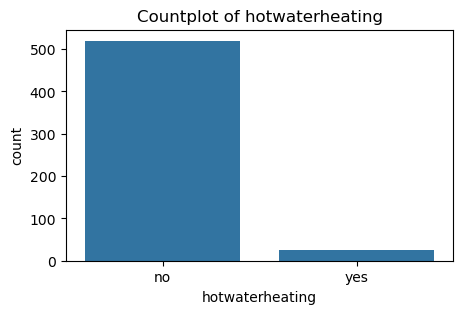

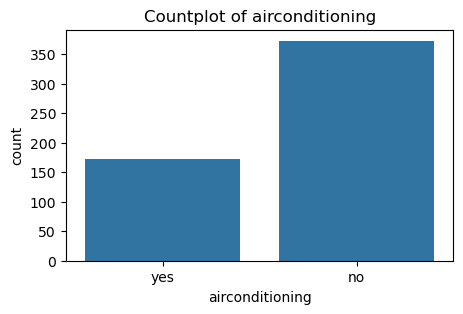

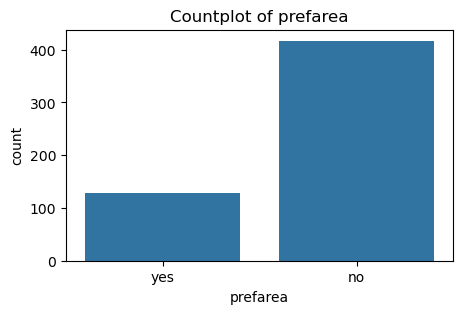

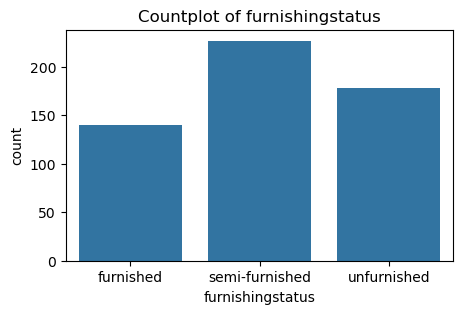

In [16]:
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=data[col])
    plt.title(f"Countplot of {col}")
    plt.show()

In [17]:
# Step 4: Encode Categorical Variables
# -------------------------
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [18]:
print("\nEncoded dataset preview:")
print(data.head())


Encoded dataset preview:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


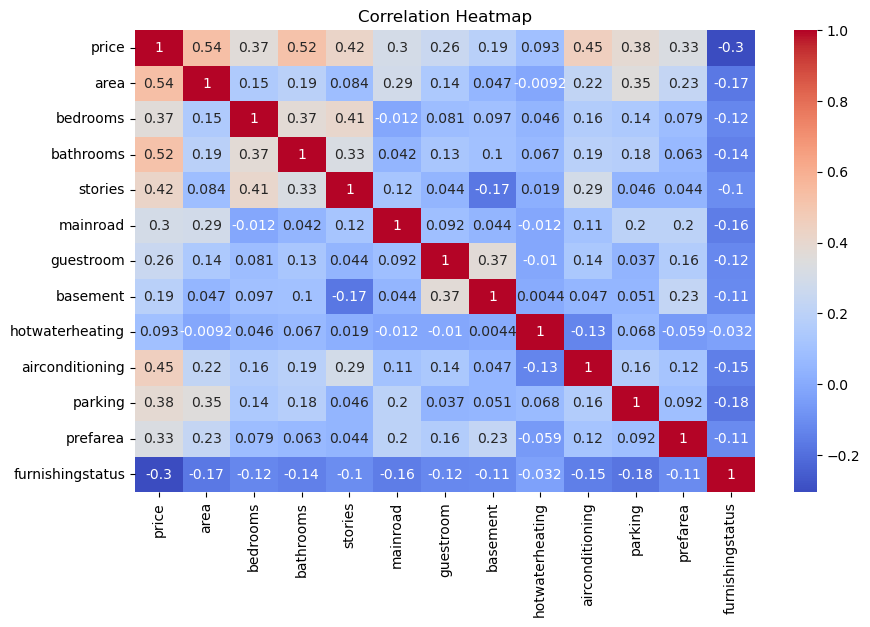

In [19]:
# Step 5: Correlation Heatmap
# -------------------------
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Step 6: Train-Test Split
# -------------------------
X = data.drop("price", axis=1)   # Features
y = data["price"]                # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# Step 7: Train Model
# -------------------------
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Step 8: Predictions
# -------------------------
y_pred = model.predict(X_test)

In [23]:
# Step 9: Evaluation
# -------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Model Performance:
Root Mean Squared Error (RMSE): 1331071.4167895105
R² Score: 0.6494754192267804


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R²:", r2_dt)

Decision Tree RMSE: 1643522.7931214864
Decision Tree R²: 0.46559904406211106
